# Bootcamp Data Science y MLOps

<img src="https://i.ibb.co/5RM26Cw/LOGO-COLOR2.png" width="500px">

Creado en [escueladedatosvivos.ai](https://escueladedatosvivos.ai) 🚀.

¿Consultas? En la página tenés soporte por IA guiada, comunidad y el acceso a certificación.

<br>

---  

# 0) Dataset 🔧🚜

Nos basamos en el dataset de Kaggle: [Machine Predictive Maintenance Classification](https://www.kaggle.com/datasets/shivamb/machine-predictive-maintenance-classification).

# 1) Cargamos los datos 📕

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
# Permitiendo importar modulos
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [3]:
data = pd.read_csv("../data/aw_fb_data.csv", sep=",", index_col=0)

In [4]:
data.head(3)

X1  age  gender  height  weight      steps  hear_rate  calories  distance  \
1   1   20       1   168.0    65.4  10.771429  78.531302  0.344533  0.008327   
2   2   20       1   168.0    65.4  11.475325  78.453390  3.287625  0.008896   
3   3   20       1   168.0    65.4  12.179221  78.540825  9.484000  0.009466   

   entropy_heart  entropy_setps  resting_heart  corr_heart_steps  norm_heart  \
1       6.221612       6.116349           59.0               1.0   19.531302   
2       6.221612       6.116349           59.0               1.0   19.453390   
3       6.221612       6.116349           59.0               1.0   19.540825   

   intensity_karvonen  sd_norm_heart  steps_times_distance       device  \
1            0.138520            1.0              0.089692  apple watch   
2            0.137967            1.0              0.102088  apple watch   
3            0.138587            1.0              0.115287  apple watch   

  activity  
1    Lying  
2    Lying  
3    Lying

# 2) Preparación de la data 👀

In [5]:
from funpymodeling import status
status(data)

variable  q_nan  p_nan  q_zeros   p_zeros  unique     type
0                     X1      0    0.0        0  0.000000    3656    int64
1                    age      0    0.0        0  0.000000      24    int64
2                 gender      0    0.0     3279  0.523467       2    int64
3                 height      0    0.0        0  0.000000      28  float64
4                 weight      0    0.0        0  0.000000      43  float64
5                  steps      0    0.0        0  0.000000    3919  float64
6              hear_rate      0    0.0        0  0.000000    4514  float64
7               calories      0    0.0        0  0.000000    2136  float64
8               distance      0    0.0        0  0.000000    4863  float64
9          entropy_heart      0    0.0       18  0.002874      56  float64
10         entropy_setps      0    0.0       90  0.014368      60  float64
11         resting_heart      0    0.0        0  0.000000      83  float64
12      corr_heart_steps      0    0.0        0  0.000000    2925  float64
13            norm_heart      0    0.0      170  0.027139    5033  float64
14    intensity_karvonen      0    0.0      170  0.027139    5841  float64
15         sd_norm_heart      0    0.0        1  0.000160    3435  float64
16  steps_times_distance      0    0.0        0  0.000000    4939  float64
17                device      0    0.0        0  0.000000       2   object
18              activity      0    0.0        0  0.000000       6   object

Eliminar la columna X1 y hacer un get dummies.

In [6]:
data = data.drop(["X1"], axis=1)

In [7]:
data.head(3)

age  gender  height  weight      steps  hear_rate  calories  distance  \
1   20       1   168.0    65.4  10.771429  78.531302  0.344533  0.008327   
2   20       1   168.0    65.4  11.475325  78.453390  3.287625  0.008896   
3   20       1   168.0    65.4  12.179221  78.540825  9.484000  0.009466   

   entropy_heart  entropy_setps  resting_heart  corr_heart_steps  norm_heart  \
1       6.221612       6.116349           59.0               1.0   19.531302   
2       6.221612       6.116349           59.0               1.0   19.453390   
3       6.221612       6.116349           59.0               1.0   19.540825   

   intensity_karvonen  sd_norm_heart  steps_times_distance       device  \
1            0.138520            1.0              0.089692  apple watch   
2            0.137967            1.0              0.102088  apple watch   
3            0.138587            1.0              0.115287  apple watch   

  activity  
1    Lying  
2    Lying  
3    Lying

# 3) AED & Storytelling 🧐

array([[<AxesSubplot: title={'center': 'age'}>,
        <AxesSubplot: title={'center': 'gender'}>,
        <AxesSubplot: title={'center': 'height'}>,
        <AxesSubplot: title={'center': 'weight'}>],
       [<AxesSubplot: title={'center': 'steps'}>,
        <AxesSubplot: title={'center': 'hear_rate'}>,
        <AxesSubplot: title={'center': 'calories'}>,
        <AxesSubplot: title={'center': 'distance'}>],
       [<AxesSubplot: title={'center': 'entropy_heart'}>,
        <AxesSubplot: title={'center': 'entropy_setps'}>,
        <AxesSubplot: title={'center': 'resting_heart'}>,
        <AxesSubplot: title={'center': 'corr_heart_steps'}>],
       [<AxesSubplot: title={'center': 'norm_heart'}>,
        <AxesSubplot: title={'center': 'intensity_karvonen'}>,
        <AxesSubplot: title={'center': 'sd_norm_heart'}>,
        <AxesSubplot: title={'center': 'steps_times_distance'}>]],
      dtype=object)

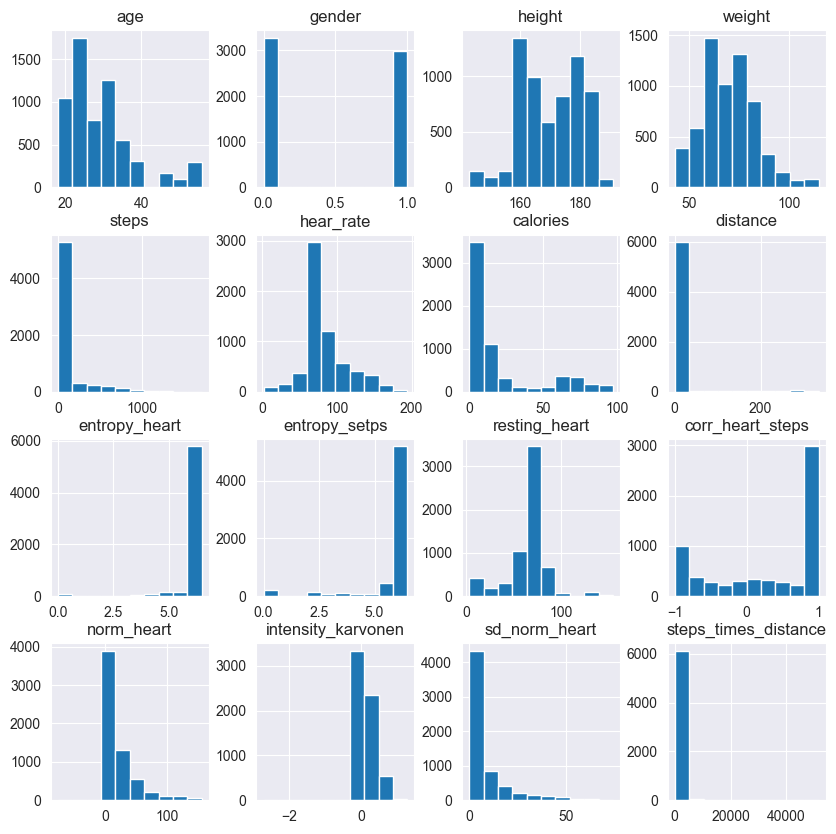

In [8]:
data.hist(figsize = (10,10))

In [9]:
len(data)

6264

In [10]:
from ydata_profiling import ProfileReport
ProfileReport(data, minimal=True)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Aplicar get dummies

In [11]:
filter_data = pd.get_dummies(data)

In [12]:
filter_data.head(3)

age  gender  height  weight      steps  hear_rate  calories  distance  \
1   20       1   168.0    65.4  10.771429  78.531302  0.344533  0.008327   
2   20       1   168.0    65.4  11.475325  78.453390  3.287625  0.008896   
3   20       1   168.0    65.4  12.179221  78.540825  9.484000  0.009466   

   entropy_heart  entropy_setps  ...  sd_norm_heart  steps_times_distance  \
1       6.221612       6.116349  ...            1.0              0.089692   
2       6.221612       6.116349  ...            1.0              0.102088   
3       6.221612       6.116349  ...            1.0              0.115287   

   device_apple watch  device_fitbit  activity_Lying  activity_Running 3 METs  \
1                   1              0               1                        0   
2                   1              0               1                        0   
3                   1              0               1                        0   

   activity_Running 5 METs  activity_Running 7 METs  activity_Self Pace walk  \
1                        0                        0                        0   
2                        0                        0                        0   
3                        0                        0                        0   

   activity_Sitting  
1                 0  
2                 0  
3                 0  

[3 rows x 24 columns]

In [13]:
status(filter_data)

variable  q_nan  p_nan  q_zeros   p_zeros  unique     type
0                       age      0    0.0        0  0.000000      24    int64
1                    gender      0    0.0     3279  0.523467       2    int64
2                    height      0    0.0        0  0.000000      28  float64
3                    weight      0    0.0        0  0.000000      43  float64
4                     steps      0    0.0        0  0.000000    3919  float64
5                 hear_rate      0    0.0        0  0.000000    4514  float64
6                  calories      0    0.0        0  0.000000    2136  float64
7                  distance      0    0.0        0  0.000000    4863  float64
8             entropy_heart      0    0.0       18  0.002874      56  float64
9             entropy_setps      0    0.0       90  0.014368      60  float64
10            resting_heart      0    0.0        0  0.000000      83  float64
11         corr_heart_steps      0    0.0        0  0.000000    2925  float64
12               norm_heart      0    0.0      170  0.027139    5033  float64
13       intensity_karvonen      0    0.0      170  0.027139    5841  float64
14            sd_norm_heart      0    0.0        1  0.000160    3435  float64
15     steps_times_distance      0    0.0        0  0.000000    4939  float64
16       device_apple watch      0    0.0     2608  0.416347       2    uint8
17            device_fitbit      0    0.0     3656  0.583653       2    uint8
18           activity_Lying      0    0.0     4885  0.779853       2    uint8
19  activity_Running 3 METs      0    0.0     5314  0.848340       2    uint8
20  activity_Running 5 METs      0    0.0     5262  0.840038       2    uint8
21  activity_Running 7 METs      0    0.0     5150  0.822158       2    uint8
22  activity_Self Pace walk      0    0.0     5375  0.858078       2    uint8
23         activity_Sitting      0    0.0     5334  0.851533       2    uint8

# 4) Clustering con K-Means 🎯

## 4.1) Tenemos que normalizar los datos (z-score)

In [14]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
std_scaler.fit(filter_data)
x_data_norm=std_scaler.transform(filter_data)

# A ver que hizo!?
pd.DataFrame(x_data_norm).describe()

0             1             2             3             4   \
count  6.264000e+03  6.264000e+03  6.264000e+03  6.264000e+03  6.264000e+03   
mean   2.268655e-17  2.177909e-16 -5.172533e-16  3.720594e-16  1.814924e-16   
std    1.000080e+00  1.000080e+00  1.000080e+00  1.000080e+00  1.000080e+00   
min   -1.252603e+00 -9.541166e-01 -2.587115e+00 -1.978652e+00 -4.873068e-01   
25%   -6.913270e-01 -9.541166e-01 -9.404466e-01 -7.147873e-01 -4.686358e-01   
50%   -1.300505e-01 -9.541166e-01 -1.655436e-01 -1.200273e-01 -4.464951e-01   
75%    4.312259e-01  1.048090e+00  9.968107e-01  5.713812e-01 -1.667584e-02   
max    3.013097e+00  1.048090e+00  2.062302e+00  3.374187e+00  7.201889e+00   

                 5             6             7             8             9   \
count  6.264000e+03  6.264000e+03  6.264000e+03  6.264000e+03  6.264000e+03   
mean   9.074620e-17  1.814924e-16 -1.814924e-17 -9.165366e-16  7.985665e-16   
std    1.000080e+00  1.000080e+00  1.000080e+00  1.000080e+00  1.000080e+00   
min   -2.929548e+00 -7.109949e-01 -3.011055e-01 -7.877479e+00 -4.569150e+00   
25%   -3.680869e-01 -6.861079e-01 -3.006985e-01  1.021668e-01  1.348908e-01   
50%   -3.098031e-01 -5.665760e-01 -2.971593e-01  2.083702e-01  3.321103e-01   
75%    3.325684e-01  3.765169e-02  4.059042e-02  2.842709e-01  4.043337e-01   
max    3.776815e+00  2.857381e+00  6.991359e+00  5.818567e-01  5.856720e-01   

       ...            14            15           16           17  \
count  ...  6.264000e+03  6.264000e+03  6264.000000  6264.000000   
mean   ...  3.629848e-17 -9.074620e-18     0.000000     0.000000   
std    ...  1.000080e+00  1.000080e+00     1.000080     1.000080   
min    ... -6.471041e-01 -1.452030e-01    -1.183993    -0.844599   
25%    ... -6.259839e-01 -1.450410e-01    -1.183993    -0.844599   
50%    ... -4.162532e-01 -1.419133e-01     0.844599    -0.844599   
75%    ...  1.251642e-01 -1.221373e-01     0.844599     1.183993   
max    ...  5.293335e+00  1.253348e+01     0.844599     1.183993   

                 18            19            20            21            22  \
count  6.264000e+03  6.264000e+03  6.264000e+03  6.264000e+03  6.264000e+03   
mean  -3.232833e-17 -2.608953e-17 -2.949251e-17  4.991041e-17 -3.913430e-17   
std    1.000080e+00  1.000080e+00  1.000080e+00  1.000080e+00  1.000080e+00   
min   -5.313123e-01 -4.228156e-01 -4.363736e-01 -4.650921e-01 -4.066883e-01   
25%   -5.313123e-01 -4.228156e-01 -4.363736e-01 -4.650921e-01 -4.066883e-01   
50%   -5.313123e-01 -4.228156e-01 -4.363736e-01 -4.650921e-01 -4.066883e-01   
75%   -5.313123e-01 -4.228156e-01 -4.363736e-01 -4.650921e-01 -4.066883e-01   
max    1.882132e+00  2.365097e+00  2.291614e+00  2.150112e+00  2.458886e+00   

                 23  
count  6.264000e+03  
mean   5.671637e-18  
std    1.000080e+00  
min   -4.175562e-01  
25%   -4.175562e-01  
50%   -4.175562e-01  
75%   -4.175562e-01  
max    2.394887e+00  

[8 rows x 24 columns]

## 4.2) Creación del modelo

In [15]:
from sklearn.cluster import KMeans

cl_model = KMeans(
    n_clusters=3,     # el parámetro importante!
    init='k-means++', # k-means++ acelera la convergencia, respecto de random
    max_iter=100, 
    random_state=0,
    n_init='auto'     # Para evitar warnings más adelante
)

cl_model.fit(x_data_norm)

KMeans(max_iter=100, n_clusters=3, n_init='auto', random_state=0)

In [16]:
pred_cl = cl_model.predict(x_data_norm)

# Número de cluster: 
pred_cl

array([2, 2, 2, ..., 1, 1, 1])

## 4.3) Pequeño paréntesis... ¿Cantidad de clusters?

In [17]:
cl_model

KMeans(max_iter=100, n_clusters=3, n_init='auto', random_state=0)

In [18]:
from copy import deepcopy

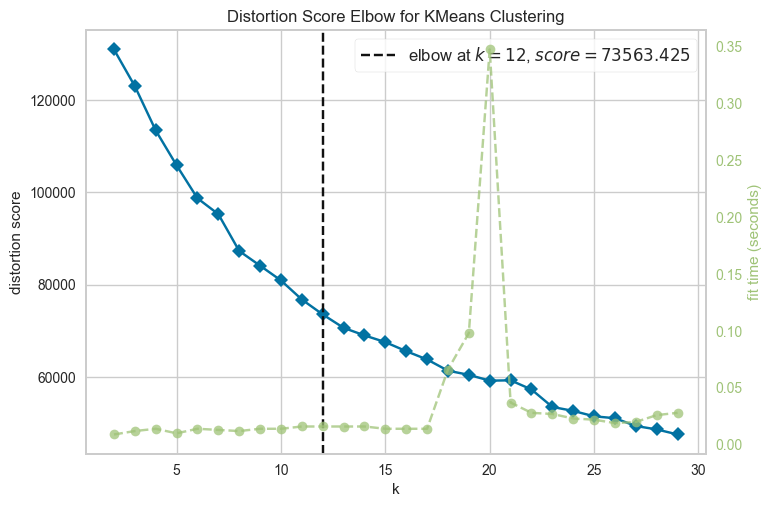

KElbowVisualizer(ax=<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(max_iter=100, n_clusters=29, n_init='auto',
                                  random_state=0),
                 k=(2, 30))

In [20]:
from yellowbrick.cluster.elbow import kelbow_visualizer

cl_model2=deepcopy(cl_model) # ojo

kelbow_visualizer(cl_model2, x_data_norm, k=(2,30), locate_elbow=True)

Copy-paste de la [doc](https://www.scikit-yb.org/en/latest/api/cluster/elbow.html): _distortion, which computes the sum of squared distances from each point to its assigned center._

## 4.4) Analizando el modelo final: Gráfico de coordenadas

Hacemos copia de los datos y le agregamos el cluster:

In [21]:
cluster_var='cluster' # definan nombre de var de clustering
x_data_cl=filter_data.copy() # hagan copia de los datos de TR para no perderlos antes de normalizar
x_data_cl[cluster_var]=cl_model.predict(x_data_norm) # ojo aca! el predict es de los datos normalizados

In [22]:
x_data_cl.head()

age  gender  height  weight      steps  hear_rate   calories  distance  \
1   20       1   168.0    65.4  10.771429  78.531302   0.344533  0.008327   
2   20       1   168.0    65.4  11.475325  78.453390   3.287625  0.008896   
3   20       1   168.0    65.4  12.179221  78.540825   9.484000  0.009466   
4   20       1   168.0    65.4  12.883117  78.628260  10.154556  0.010035   
5   20       1   168.0    65.4  13.587013  78.715695  10.825111  0.010605   

   entropy_heart  entropy_setps  ...  steps_times_distance  \
1       6.221612       6.116349  ...              0.089692   
2       6.221612       6.116349  ...              0.102088   
3       6.221612       6.116349  ...              0.115287   
4       6.221612       6.116349  ...              0.129286   
5       6.221612       6.116349  ...              0.144088   

   device_apple watch  device_fitbit  activity_Lying  activity_Running 3 METs  \
1                   1              0               1                        0   
2                   1              0               1                        0   
3                   1              0               1                        0   
4                   1              0               1                        0   
5                   1              0               1                        0   

   activity_Running 5 METs  activity_Running 7 METs  activity_Self Pace walk  \
1                        0                        0                        0   
2                        0                        0                        0   
3                        0                        0                        0   
4                        0                        0                        0   
5                        0                        0                        0   

   activity_Sitting  cluster  
1                 0        2  
2                 0        2  
3                 0        2  
4                 0        2  
5                 0        2  

[5 rows x 25 columns]

In [23]:
from funpymodeling import coord_plot

In [24]:
import matplotlib.pyplot as plt

In [25]:
colormap=plt.get_cmap("Dark2") 

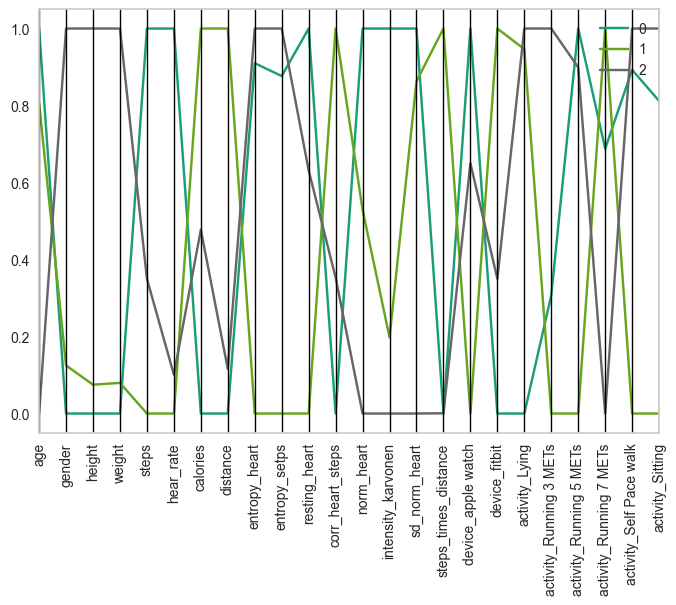

In [26]:
d_orig, d_transf = coord_plot(x_data_cl, cluster_var)

Storytelling: 

Cluster 0: 

In [27]:
d_orig

age    gender      height     weight       steps   hear_rate  \
0  32.602427  0.110680  162.972718  63.162233  219.358436  102.637629   
1  31.121053  0.216374  164.179357  64.385848   12.899306   76.494543   
2  24.968324  0.957097  179.064555  78.528869   85.149099   79.132470   

    calories   distance  entropy_heart  entropy_setps  ...  \
0   3.505672   0.124712       6.127022       5.997299  ...   
1  37.983041  43.077113       5.713085       4.810877  ...   
2  19.967449   5.103590       6.167942       6.164485  ...   

   steps_times_distance  device_apple watch  device_fitbit  activity_Lying  \
0             47.995909            0.993204       0.006796        0.204854   
1           2031.691136            0.000000       1.000000        0.226901   
2             49.285213            0.645549       0.354451        0.228148   

   activity_Running 3 METs  activity_Running 5 METs  activity_Running 7 METs  \
0                 0.147087                 0.166505                 0.188835   
1                 0.139766                 0.145614                 0.207018   
2                 0.163593                 0.164395                 0.148757   

   activity_Self Pace walk  activity_Sitting  cluster  
0                 0.142718          0.150000        0  
1                 0.139181          0.141520        1  
2                 0.143144          0.151965        2  

[3 rows x 25 columns]

In [28]:
d_transf

age    gender    height    weight     steps  hear_rate  calories  \
0  1.000000  0.000000  0.000000  0.000000  1.000000   1.000000  0.000000   
1  0.805953  0.124873  0.074984  0.079628  0.000000   0.000000  1.000000   
2  0.000000  1.000000  1.000000  1.000000  0.349947   0.100903  0.477466   

   distance  entropy_heart  entropy_setps  ...  steps_times_distance  \
0  0.000000       0.910038       0.876488  ...               0.00000   
1  1.000000       0.000000       0.000000  ...               1.00000   
2  0.115916       1.000000       1.000000  ...               0.00065   

   device_apple watch  device_fitbit  activity_Lying  activity_Running 3 METs  \
0            1.000000       0.000000        0.000000                 0.307275   
1            0.000000       1.000000        0.946466                 0.000000   
2            0.649967       0.350033        1.000000                 1.000000   

   activity_Running 5 METs  activity_Running 7 METs  activity_Self Pace walk  \
0                 1.000000                 0.687909                 0.892713   
1                 0.000000                 1.000000                 0.000000   
2                 0.898984                 0.000000                 1.000000   

   activity_Sitting  cluster  
0          0.811885        0  
1          0.000000        1  
2          1.000000        2  

[3 rows x 25 columns]

## Bonus: Scatter 3D!

In [30]:

status(filter_data)

variable  q_nan  p_nan  q_zeros   p_zeros  unique     type
0                       age      0    0.0        0  0.000000      24    int64
1                    gender      0    0.0     3279  0.523467       2    int64
2                    height      0    0.0        0  0.000000      28  float64
3                    weight      0    0.0        0  0.000000      43  float64
4                     steps      0    0.0        0  0.000000    3919  float64
5                 hear_rate      0    0.0        0  0.000000    4514  float64
6                  calories      0    0.0        0  0.000000    2136  float64
7                  distance      0    0.0        0  0.000000    4863  float64
8             entropy_heart      0    0.0       18  0.002874      56  float64
9             entropy_setps      0    0.0       90  0.014368      60  float64
10            resting_heart      0    0.0        0  0.000000      83  float64
11         corr_heart_steps      0    0.0        0  0.000000    2925  float64
12               norm_heart      0    0.0      170  0.027139    5033  float64
13       intensity_karvonen      0    0.0      170  0.027139    5841  float64
14            sd_norm_heart      0    0.0        1  0.000160    3435  float64
15     steps_times_distance      0    0.0        0  0.000000    4939  float64
16       device_apple watch      0    0.0     2608  0.416347       2    uint8
17            device_fitbit      0    0.0     3656  0.583653       2    uint8
18           activity_Lying      0    0.0     4885  0.779853       2    uint8
19  activity_Running 3 METs      0    0.0     5314  0.848340       2    uint8
20  activity_Running 5 METs      0    0.0     5262  0.840038       2    uint8
21  activity_Running 7 METs      0    0.0     5150  0.822158       2    uint8
22  activity_Self Pace walk      0    0.0     5375  0.858078       2    uint8
23         activity_Sitting      0    0.0     5334  0.851533       2    uint8

In [32]:
# Tomamos muestra para que no nos explote el gráfico ;)
d2=filter_data.sample(n=300)

In [33]:
# Usamos la maravilla de plotly
import plotly.express as px

fig = px.scatter_3d(d2, x='gender', y='age', z='calories', color='activity')
fig.show()

ValueError: Value of 'color' is not the name of a column in 'data_frame'. Expected one of ['age', 'gender', 'height', 'weight', 'steps', 'hear_rate', 'calories', 'distance', 'entropy_heart', 'entropy_setps', 'resting_heart', 'corr_heart_steps', 'norm_heart', 'intensity_karvonen', 'sd_norm_heart', 'steps_times_distance', 'device_apple watch', 'device_fitbit', 'activity_Lying', 'activity_Running 3 METs', 'activity_Running 5 METs', 'activity_Running 7 METs', 'activity_Self Pace walk', 'activity_Sitting'] but received: activity

In [34]:
import plotly.express as px
fig = px.bar(x=["a", "b", "c"], y=[1, 3, 2])
fig.show()

**Nota** 
<br>Si no aparece el gráfico -> Instalar en la consola la extension:

`jupyter labextension install jupyterlab-plotly`

Luego reiniciar jupyer lab.

---

## Resumen!

- Modelo de clustering k-means (k=3)
- Gráfico del codo (elbow)
- Creamos datos para el visualizador
- Exploramos el modelo con `coord_plot` de `funpymodeling` <3



# 5) Clustering con HDBSCAN 🤖

## 5.1) Creación del modelo

Doc oficial: https://hdbscan.readthedocs.io/en/latest/

Ojo: En sklearn esta dbscan (sin la H). Es casi igual pero con más hiperparámetros.
<br>En HDBSCAN encuentra internamente prueba distintos valores (usen este).

In [ ]:
#!pip3 install hdbscan

In [35]:
import hdbscan

Generamos el modelo y fiteamos:
<br>**Condición todas las variables numéricas y sin nulos.**

In [39]:
model_hdb = hdbscan.HDBSCAN()
model_hdb.fit(filter_data)

HDBSCAN()

In [40]:
# Nro de cluster
model_hdb.labels_

array([195, 195, 195, ...,  87,  87,  87], dtype=int64)

In [41]:
from funpymodeling import freq_tbl, todf

freq_tbl(model_hdb.labels_.astype('str'))

0  frequency  percentage cumulative_perc
0     -1       2675    0.427043        0.427043
1    160         73    0.011654        0.438697
2    116         73    0.011654        0.450351
3    127         67    0.010696        0.461047
4    201         63    0.010057        0.471105
..   ...        ...         ...             ...
223  143          5    0.000798        0.996807
224   39          5    0.000798        0.997605
225   16          5    0.000798        0.998404
226  167          5    0.000798        0.999202
227  112          5    0.000798             1.0

[228 rows x 4 columns]

**8 clusters**

Y uno de ellos es de ruido (indicado con el `-1`)

## 5.2) Tuning/regularización de HDBSCAN para menos clusters

Muy útil cuando tenes muchos clusters

In [42]:
# Ese 4 significa que cada cluster va a tener como mínimo 4 casos
model_hdb2 = hdbscan.HDBSCAN(min_cluster_size=3).fit(filter_data)

In [43]:
freq_tbl(model_hdb2.labels_.astype('str'))

0  frequency  percentage cumulative_perc
0     -1       1925    0.307312        0.307312
1    230         99    0.015805        0.323116
2    267         70    0.011175        0.334291
3    310         57      0.0091        0.343391
4    406         56     0.00894        0.352331
..   ...        ...         ...             ...
436  340          3    0.000479        0.998084
437   31          3    0.000479        0.998563
438  313          3    0.000479        0.999042
439   80          3    0.000479        0.999521
440  369          3    0.000479             1.0

[441 rows x 4 columns]

**Notar el cluster de ruido. ¿qué cambió?**

## 5.3) Análisis del modelo cluster (profiling)

In [44]:
cluster_var='cluster' # definan nombre de var de clustering
x_data_cl=filter_data.copy() # hagan copia de los datos de TR para no perderlos
x_data_cl[cluster_var]=model_hdb2.labels_ # ojo aca! el predict es de los datos normalizados

In [45]:
x_data_cl.head()

age  gender  height  weight      steps  hear_rate   calories  distance  \
1   20       1   168.0    65.4  10.771429  78.531302   0.344533  0.008327   
2   20       1   168.0    65.4  11.475325  78.453390   3.287625  0.008896   
3   20       1   168.0    65.4  12.179221  78.540825   9.484000  0.009466   
4   20       1   168.0    65.4  12.883117  78.628260  10.154556  0.010035   
5   20       1   168.0    65.4  13.587013  78.715695  10.825111  0.010605   

   entropy_heart  entropy_setps  ...  steps_times_distance  \
1       6.221612       6.116349  ...              0.089692   
2       6.221612       6.116349  ...              0.102088   
3       6.221612       6.116349  ...              0.115287   
4       6.221612       6.116349  ...              0.129286   
5       6.221612       6.116349  ...              0.144088   

   device_apple watch  device_fitbit  activity_Lying  activity_Running 3 METs  \
1                   1              0               1                        0   
2                   1              0               1                        0   
3                   1              0               1                        0   
4                   1              0               1                        0   
5                   1              0               1                        0   

   activity_Running 5 METs  activity_Running 7 METs  activity_Self Pace walk  \
1                        0                        0                        0   
2                        0                        0                        0   
3                        0                        0                        0   
4                        0                        0                        0   
5                        0                        0                        0   

   activity_Sitting  cluster  
1                 0      380  
2                 0      380  
3                 0      380  
4                 0      380  
5                 0      380  

[5 rows x 25 columns]

Saquemos el cluster de ruido:

In [46]:
x_data_cl=x_data_cl[x_data_cl['cluster']!=-1]

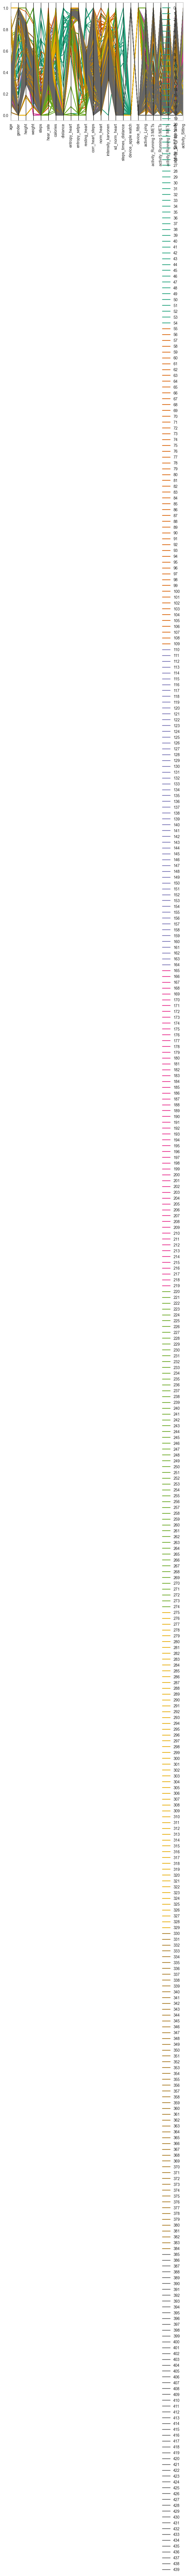

In [47]:
from funpymodeling import coord_plot
d_orig, d_transf = coord_plot(x_data_cl, cluster_var)

In [48]:
d_orig

age    gender      height     weight       steps   hear_rate  \
0    23.500000  0.500000  164.000000  68.500000  183.666667   72.668350   
1    24.833333  0.500000  167.333333  65.916667   83.500000  126.706710   
2    25.428571  0.214286  163.714286  61.485714   53.428571  110.141737   
3    29.500000  0.750000  178.450000  92.325000  141.000000   58.100000   
4    27.571429  0.571429  159.142857  68.185714  175.285714   97.401154   
..         ...       ...         ...        ...         ...         ...   
435  25.000000  1.000000  160.000000  75.000000   17.437358   68.156748   
436  30.000000  0.000000  164.000000  68.000000   13.418172   77.480320   
437  30.000000  0.000000  164.000000  68.000000   30.651570   71.961662   
438  32.000000  1.000000  177.000000  76.700000   39.880423   76.052632   
439  32.000000  1.000000  177.000000  76.700000   26.725397   76.731547   

      calories    distance  entropy_heart  entropy_setps  ...  \
0    36.666667  279.333333       5.300024       3.811100  ...   
1    43.750000  212.000000       5.106046       2.516717  ...   
2    45.857143  243.857143       5.417898       2.933269  ...   
3    63.125000  223.000000       3.509717       0.802163  ...   
4    26.000000  268.571429       6.082296       3.673759  ...   
..         ...         ...            ...            ...  ...   
435  15.165287    0.018028       6.266787       6.266787  ...   
436  12.507822    0.009949       6.026439       6.149747  ...   
437   9.655766    0.024112       6.026439       6.149747  ...   
438  17.251400    0.028754       6.142147       6.169925  ...   
439  15.842350    0.019523       6.142147       6.169925  ...   

     steps_times_distance  device_apple watch  device_fitbit  activity_Lying  \
0            51304.666667                 0.0            1.0        0.500000   
1            15464.333333                 0.0            1.0        0.000000   
2            11127.928571                 0.0            1.0        0.142857   
3            31443.000000                 0.0            1.0        0.000000   
4            47083.714286                 0.0            1.0        0.428571   
..                    ...                 ...            ...             ...   
435              0.326067                 1.0            0.0        0.234043   
436              0.134890                 1.0            0.0        0.290323   
437              0.825396                 1.0            0.0        0.135135   
438              1.147175                 1.0            0.0        0.000000   
439              0.554059                 1.0            0.0        0.238095   

     activity_Running 3 METs  activity_Running 5 METs  \
0                   0.500000                 0.000000   
1                   0.000000                 0.166667   
2                   0.428571                 0.000000   
3                   0.000000                 0.250000   
4                   0.285714                 0.000000   
..                       ...                      ...   
435                 0.255319                 0.255319   
436                 0.161290                 0.000000   
437                 0.108108                 0.297297   
438                 0.000000                 1.000000   
439                 0.285714                 0.166667   

     activity_Running 7 METs  activity_Self Pace walk  activity_Sitting  \
0                   0.000000                 0.000000          0.000000   
1                   0.333333                 0.500000          0.000000   
2                   0.357143                 0.071429          0.000000   
3                   0.500000                 0.000000          0.250000   
4                   0.142857                 0.000000          0.142857   
..                       ...                      ...               ...   
435                 0.000000                 0.234043          0.021277   
436                 0.032258                 0.354839          0.161290   
437     

In [49]:
d_transf

age    gender    height    weight     steps  hear_rate  calories  \
0    0.144737  0.500000  0.437500  0.354167  0.131743   0.381620  0.384760   
1    0.179825  0.500000  0.506944  0.318287  0.059501   0.677624  0.459212   
2    0.195489  0.214286  0.431548  0.256746  0.037812   0.586887  0.481360   
3    0.302632  0.750000  0.738542  0.685069  0.100971   0.301819  0.662862   
4    0.251880  0.571429  0.336310  0.349802  0.125698   0.517098  0.272643   
..        ...       ...       ...       ...       ...        ...       ...   
435  0.184211  1.000000  0.354167  0.444444  0.011855   0.356907  0.158760   
436  0.315789  0.000000  0.437500  0.347222  0.008956   0.407978  0.130828   
437  0.315789  0.000000  0.437500  0.347222  0.021385   0.377749  0.100850   
438  0.368421  1.000000  0.708333  0.468056  0.028041   0.400158  0.180687   
439  0.368421  1.000000  0.708333  0.468056  0.018554   0.403877  0.165877   

     distance  entropy_heart  entropy_setps  ...  steps_times_distance  \
0    0.930077       0.818444       0.588520  ...              1.000000   
1    0.705880       0.788489       0.388638  ...              0.301421   
2    0.811954       0.836646       0.452963  ...              0.216899   
3    0.742507       0.541980       0.123872  ...              0.612868   
4    0.894244       0.939244       0.567312  ...              0.917728   
..        ...            ...            ...  ...                   ...   
435  0.000054       0.967734       0.967734  ...              0.000006   
436  0.000027       0.930619       0.949660  ...              0.000002   
437  0.000074       0.930619       0.949660  ...              0.000016   
438  0.000089       0.948487       0.952776  ...              0.000022   
439  0.000059       0.948487       0.952776  ...              0.000011   

     device_apple watch  device_fitbit  activity_Lying  \
0                   0.0            1.0        0.500000   
1                   0.0            1.0        0.000000   
2                   0.0            1.0        0.142857   
3                   0.0            1.0        0.000000   
4                   0.0            1.0        0.428571   
..                  ...            ...             ...   
435                 1.0            0.0        0.234043   
436                 1.0            0.0        0.290323   
437                 1.0            0.0        0.135135   
438                 1.0            0.0        0.000000   
439                 1.0            0.0        0.238095   

     activity_Running 3 METs  activity_Running 5 METs  \
0                   0.500000                 0.000000   
1                   0.000000                 0.166667   
2                   0.428571                 0.000000   
3                   0.000000                 0.250000   
4                   0.285714                 0.000000   
..                       ...                      ...   
435                 0.255319                 0.255319   
436                 0.161290                 0.000000   
437                 0.108108                 0.297297   
438                 0.000000                 1.000000   
439                 0.285714                 0.166667   

     activity_Running 7 METs  activity_Self Pace walk  activity_Sitting  \
0                   0.000000                 0.000000          0.000000   
1                   0.333333                 0.500000          0.000000   
2                   0.357143                 0.071429          0.000000   
3                   0.500000                 0.000000          0.250000   
4                   0.142857                 0.000000          0.142857   
..                       ...                      ...               ...   
435                 0.000000                 0.234043          0.021277   
436                 0.032258                 0.354839          0.161290   
437                 0.297297                 0.000000          0.162162   
438                 0.000000                 0.00000

In [50]:
freq_tbl(x_data_cl['cluster'])

'No categorical variables to analyze.'

## 5.4) _Sanity check!_

In [52]:
data_check=filter_data.copy()
data_check['cluster']=model_hdb2.labels_
#data_check=data_check[['cluster', 'track_name']]

In [53]:
data_check.head(3)

age  gender  height  weight      steps  hear_rate  calories  distance  \
1   20       1   168.0    65.4  10.771429  78.531302  0.344533  0.008327   
2   20       1   168.0    65.4  11.475325  78.453390  3.287625  0.008896   
3   20       1   168.0    65.4  12.179221  78.540825  9.484000  0.009466   

   entropy_heart  entropy_setps  ...  steps_times_distance  \
1       6.221612       6.116349  ...              0.089692   
2       6.221612       6.116349  ...              0.102088   
3       6.221612       6.116349  ...              0.115287   

   device_apple watch  device_fitbit  activity_Lying  activity_Running 3 METs  \
1                   1              0               1                        0   
2                   1              0               1                        0   
3                   1              0               1                        0   

   activity_Running 5 METs  activity_Running 7 METs  activity_Self Pace walk  \
1                        0                        0                        0   
2                        0                        0                        0   
3                        0                        0                        0   

   activity_Sitting  cluster  
1                 0      380  
2                 0      380  
3                 0      380  

[3 rows x 25 columns]

## 5.5) Calculo de Silhouette

#### Repasando Silhouette:
    
Rango: [-1,+1]

+1: el punto esta muy cerca de su centroide

0: el punto esta en el medio de 2 clusters

-1: el punto asignado al cluster i esta más cerca del centroide del cluster j

### Calculandolo especialmente para HDBSCAN

In [54]:
from sklearn.metrics import silhouette_score, silhouette_samples

sil_avg = silhouette_score(filter_data, model_hdb2.labels_)

`silhouette_score`: nos da el promedio global

In [55]:
sil_avg

-0.021581488819696834

`silhouette_samples` nos da el valor silhouette para cada registro:

In [56]:
sample_silhouette_values = silhouette_samples(filter_data, model_hdb2.labels_)

In [57]:
sample_silhouette_values

array([-0.26844259, -0.17143825,  0.18120146, ...,  0.98894936,
        0.98894936,  0.98894936])

In [58]:
res_sil=pd.DataFrame({'sil_value': sample_silhouette_values, 'cluster': model_hdb2.labels_})

Nuevo gráfico para observar la distribución

<AxesSubplot: xlabel='cluster', ylabel='sil_value'>

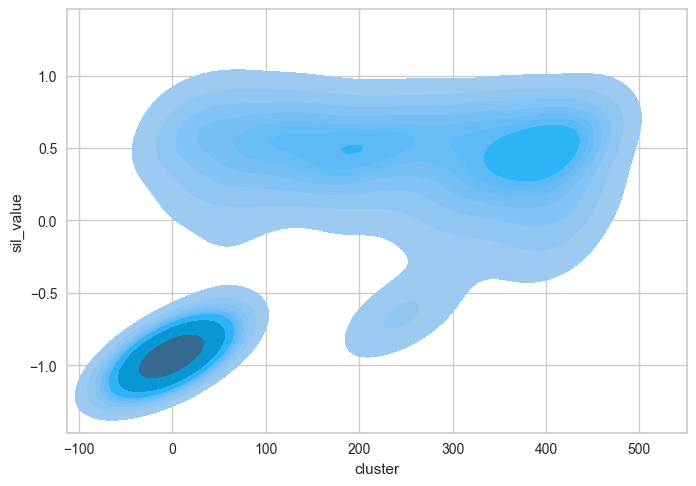

In [59]:
sns.kdeplot(data=res_sil, x='cluster', y='sil_value', fill=True)

<AxesSubplot: xlabel='cluster', ylabel='sil_value'>

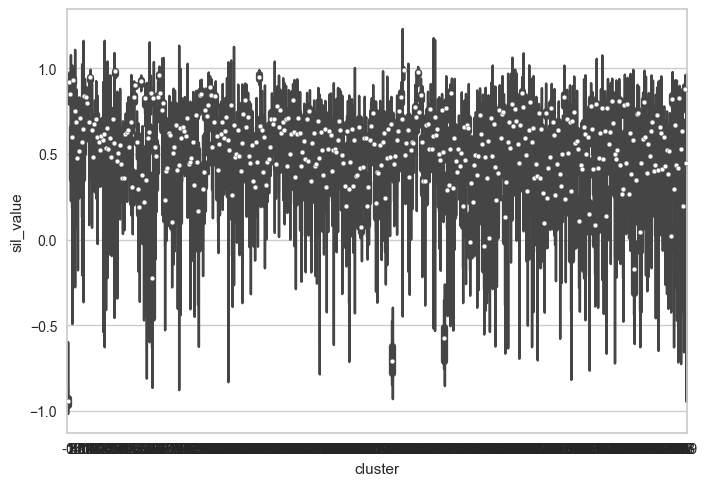

In [60]:
sns.violinplot(data=res_sil, x='cluster', y='sil_value', fill=True)

<AxesSubplot: xlabel='cluster', ylabel='sil_value'>

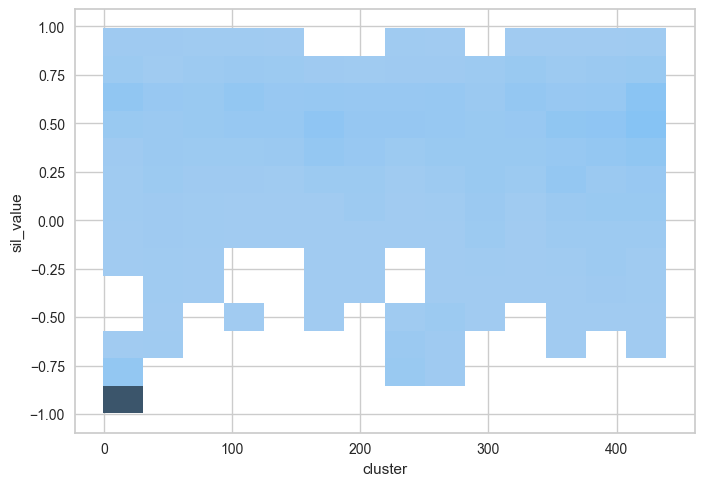

In [61]:
sns.histplot(data=res_sil, x='cluster', y='sil_value', fill=True)

Promedio de Silhouette por cluster:

In [62]:
res_sil.groupby('cluster').mean('sil_value')

sil_value
cluster           
-1       -0.936457
 0        0.901415
 1        0.774713
 2        0.455050
 3        0.927915
...            ...
 435      0.467817
 436      0.579388
 437      0.149681
 438      0.871084
 439      0.287983

[441 rows x 1 columns]

--- 

# Ejercicio 🏃‍♀️ 🏃 ⏱

**Consideraciones**
- Nos basamos en el dataset de Kaggle: [Apple Watch and Fitbit data](https://www.kaggle.com/datasets/aleespinosa/apple-watch-and-fitbit-data).
<br>`data = pd.read_csv("aw_fb_data.csv", sep=",", index_col=0)`
- Repliquen el notebook y apliquen lo aprendido a este dataset.

**Preparación de datos**
- Eliminar la columna `X1` y hacer un get dummies.

**KMeans**
- Probar con `n_clusters=3`.
- Gráfico 3D para las columnas `x='gender', y='age', z='calories'` y `color='activity'`

**HDBSCAN**
- Probar con `min_cluster_size=80`.
---

**Output**

Hagan un storytelling para 3 cluster que les llamo la atención, tanto para KMeans y HDBSCAN.